In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors


%matplotlib inline

In [2]:
#Load the dataset
iris = pd.read_csv('Iris.csv')
y = iris.iloc[:,5].values
cat = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
      }
for f in range(0,150):
        t = y[f]
        y[f] = cat.get(t)
X = iris.iloc[:,[i for i in range(1,5)]].values
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


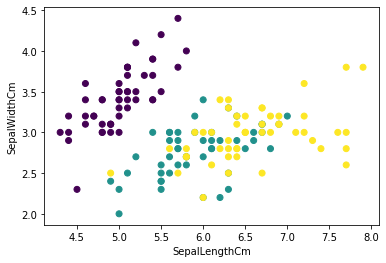

In [54]:
#Visualizing the data
#Plotting scatterplots for each category
plt.scatter(x = iris['SepalLengthCm'],y = iris['SepalWidthCm'],c = y)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

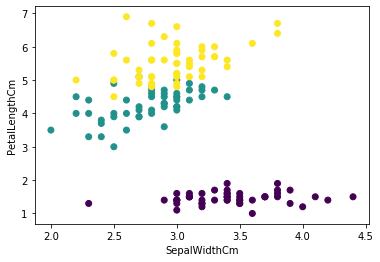

In [55]:
plt.scatter(x = iris['SepalWidthCm'],y = iris['PetalLengthCm'],c = y)
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
plt.show()

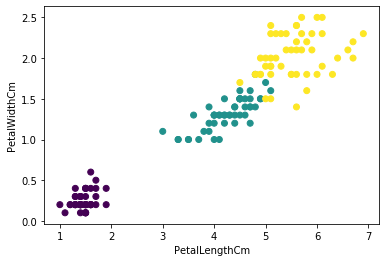

In [56]:
plt.scatter(x = iris['PetalLengthCm'],y = iris['PetalWidthCm'],c = y)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

K Means Clustering

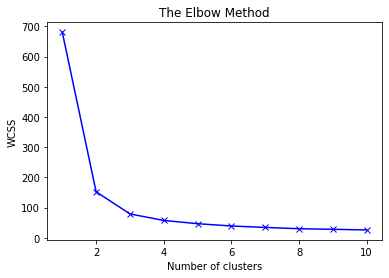

In [3]:
#K Means Clustering
#Using Elbow Method to choose the right no. of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph we can see the elbow point is 3 to be the optimal value of k. 

In [4]:
#Running K Means algorithm
model = KMeans(n_clusters = 3,init = 'k-means++')
y_pred = model.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [85]:
centers = model.cluster_centers_
print(centers)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


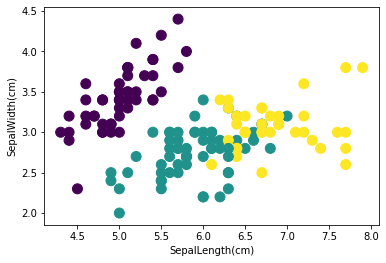

In [86]:
#Visualizing our results
plt.scatter(x = X[:,0],y = X[:,1],c = y_pred,s = 100)
plt.xlabel("SepalLength(cm)")
plt.ylabel("SepalWidth(cm)")
plt.show()

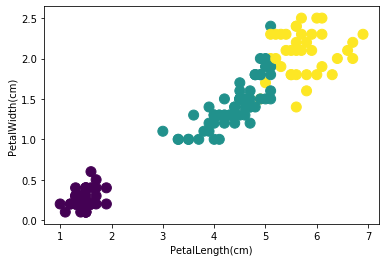

In [87]:
plt.scatter(X[:,2],X[:,3],c = y_pred,s = 100)
plt.xlabel("PetalLength(cm)")
plt.ylabel("PetalWidth(cm)")
plt.show()

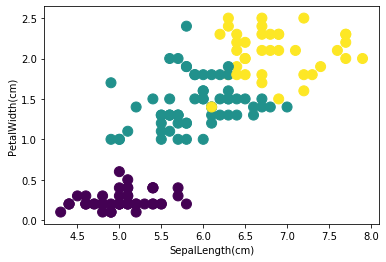

In [88]:
plt.scatter(X[:,0],X[:,3],c = y_pred,s = 100)
plt.xlabel("SepalLength(cm)")
plt.ylabel("PetalWidth(cm)")
plt.show()

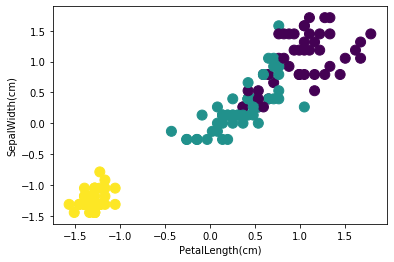

In [66]:
plt.scatter(X[:,2],X[:,3],c = y_pred,s = 100)
plt.xlabel("PetalLength(cm)")
plt.ylabel("SepalWidth(cm)")
plt.show()

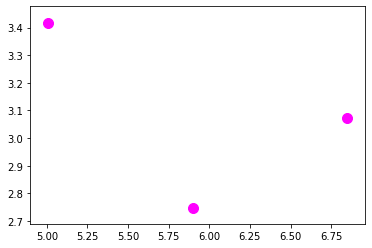

In [89]:
#Plotting the centroids
plt.scatter(centers[:,0],centers[:,1],c = 'magenta',s = 100,label = 'centroids')
plt.show()

Now we will use hierarichal clustering to predict the optimal no. of clusters and check whether it is consistent with K Means Clustering or not

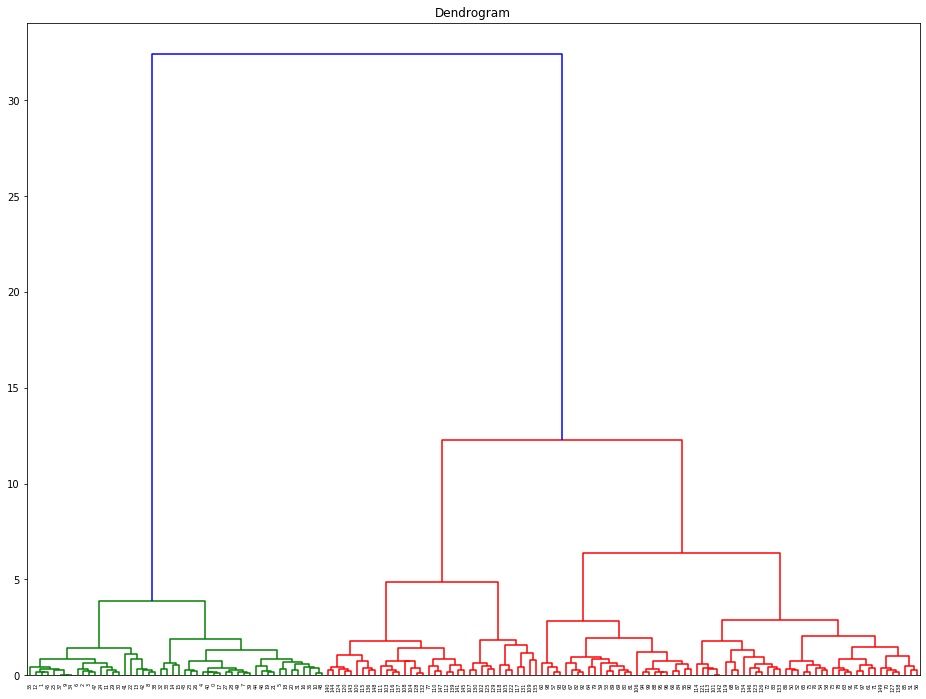

In [5]:
plt.figure(figsize = (16,12))
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [6]:
#Fitting hierarichal clustering to the iris dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [92]:
#Visualizing the result and comparing it with the actual one and the one predicted
#using K Means clustering
def visualize(i,j):
    
    idx = {0:'SepalLengthCm',
           1:'SepalWidthCm',
           2:'PetalLengthCm',
           3:'PetalWidthCm'
          }
    
   # Plot the identified clusters and compare with the answers
    fig, ax = plt.subplots(1, 3, figsize=(24,9))
    ax[0].scatter(X[:, i], X[:, j], c=y,cmap = 'viridis', 
    edgecolor='k')
    ax[1].scatter(X[:, i], X[:, j], c=y_hc, cmap='jet',
    edgecolor='k')
    ax[2].scatter(X[:, i], X[:, j], c=y_pred, cmap='jet',
    edgecolor='k')
    ax[0].set_xlabel(idx[i], fontsize=18)
    ax[0].set_ylabel(idx[j], fontsize=18)
    ax[1].set_xlabel(idx[i], fontsize=18)
    ax[1].set_ylabel(idx[j], fontsize=18)
    ax[2].set_xlabel(idx[i], fontsize=18)
    ax[2].set_ylabel(idx[j], fontsize=18)
    ax[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    ax[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    ax[2].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    ax[0].set_title('Actual', fontsize=18)
    ax[1].set_title('Hierarichal Clustering', fontsize=18)
    ax[2].set_title('K means Clustering',fontsize = 18)

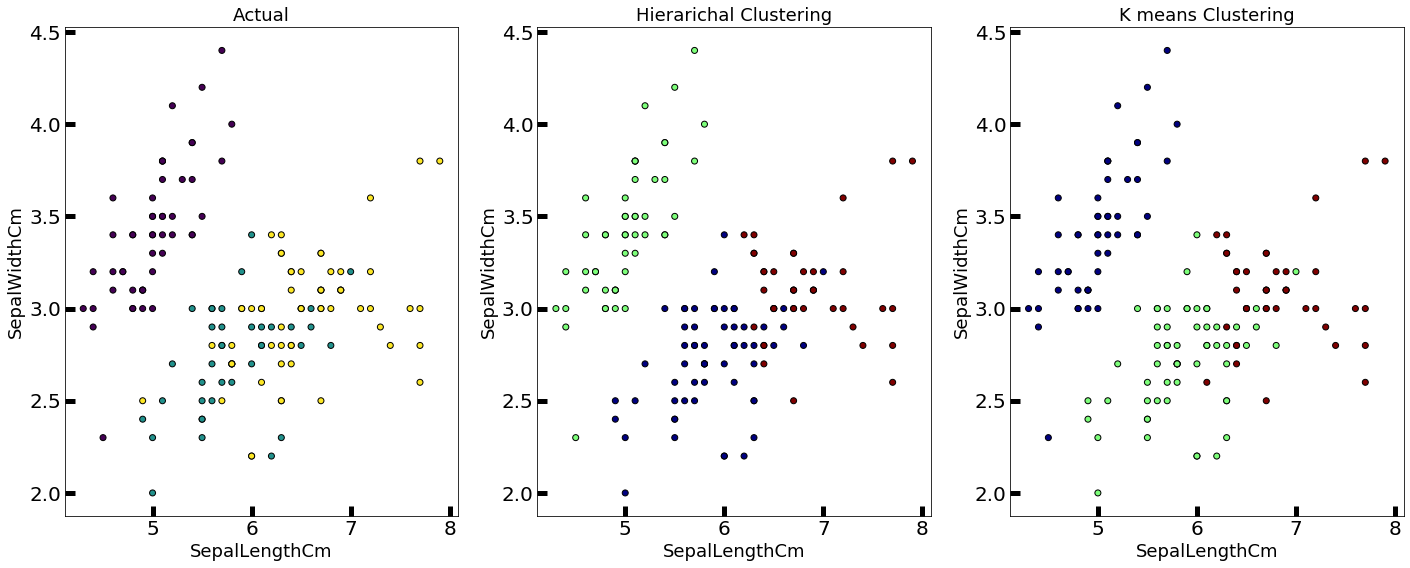

In [93]:
visualize(i = 0,j = 1)

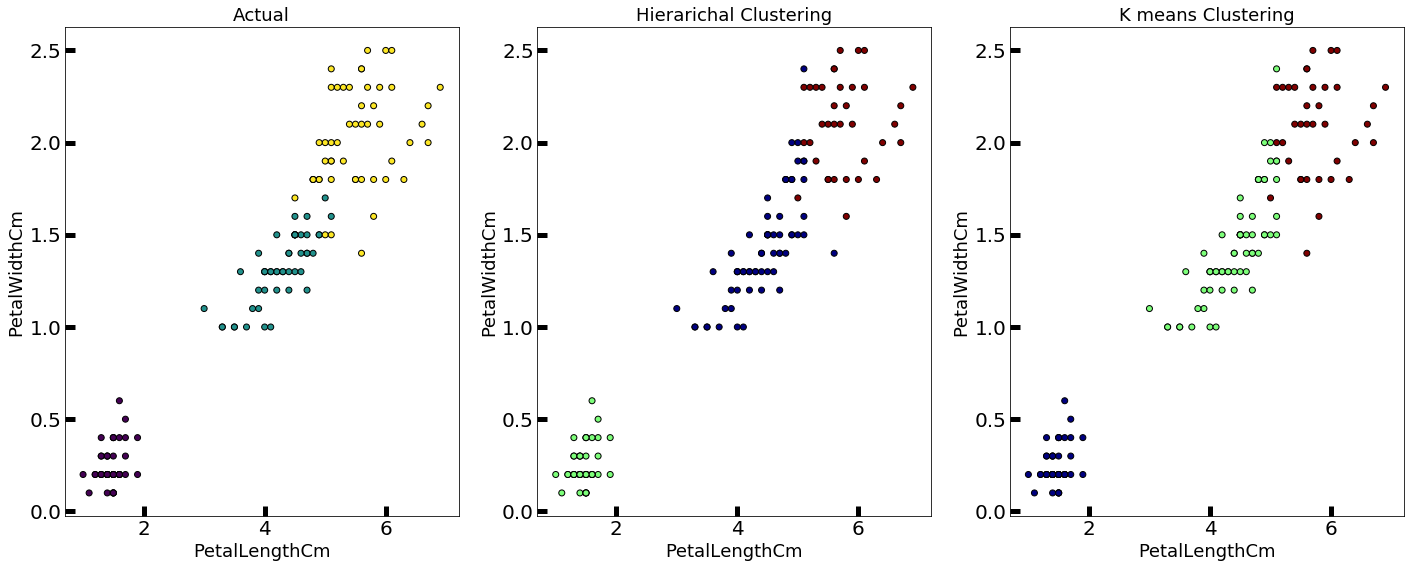

In [94]:
visualize(i = 2,j = 3)

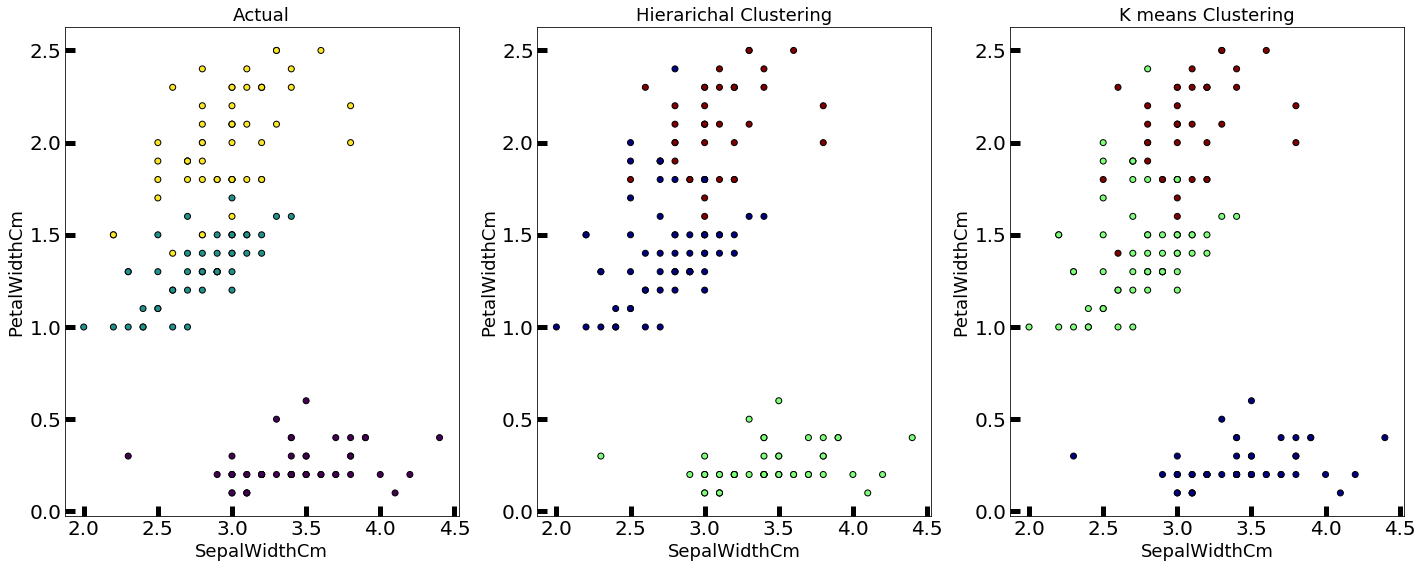

In [95]:
visualize(1,3)

Density Based Clustering of Applications with noise(DBSCAN)

Finding the optimal value of Epsilon using DMDBSCAN algorithm

In [7]:
neigh = NearestNeighbors(n_neighbors = 3)
nbrs = neigh.fit(X)
distances,indices = nbrs.kneighbors(X)

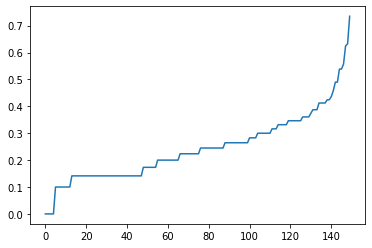

In [8]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [15]:
dbscan = DBSCAN(eps = 1,min_samples = 4)
clusters = dbscan.fit_predict(X)

In [10]:
def cluster(i,j):
    
    idx = {0:'SepalLengthCm',
           1:'SepalWidthCm',
           2:'PetalLengthCm',
           3:'PetalWidthCm'
          }
    
   # Plot the identified clusters and compare with the answers
    fig, ax = plt.subplots(1, 3, figsize=(24,9))
    ax[0].scatter(X[:, i], X[:, j], c=clusters,cmap = 'viridis', 
    edgecolor='k')
    ax[1].scatter(X[:, i], X[:, j], c=y_hc, cmap='jet',
    edgecolor='k')
    ax[2].scatter(X[:, i], X[:, j], c=y_pred, cmap='jet',
    edgecolor='k')
    ax[0].set_xlabel(idx[i], fontsize=18)
    ax[0].set_ylabel(idx[j], fontsize=18)
    ax[1].set_xlabel(idx[i], fontsize=18)
    ax[1].set_ylabel(idx[j], fontsize=18)
    ax[2].set_xlabel(idx[i], fontsize=18)
    ax[2].set_ylabel(idx[j], fontsize=18)
    ax[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    ax[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    ax[2].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    ax[0].set_title('DBSCAN', fontsize=18)
    ax[1].set_title('Hierarichal Clustering', fontsize=18)
    ax[2].set_title('K means Clustering',fontsize = 18)

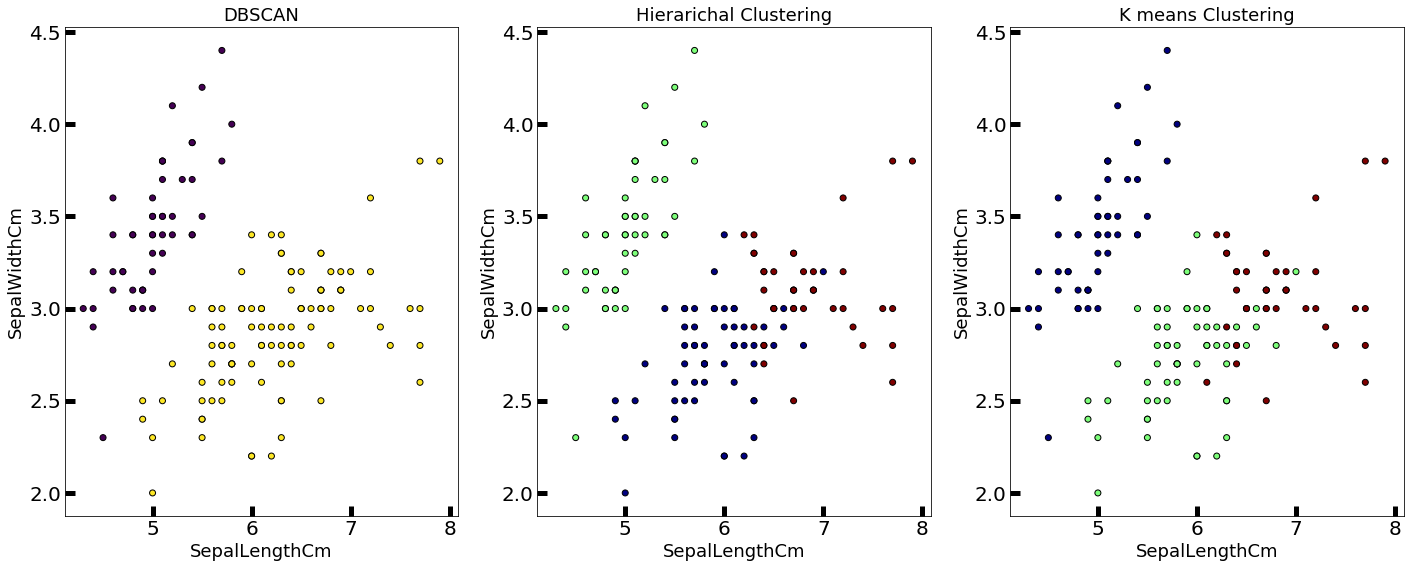

In [18]:
cluster(0,1)

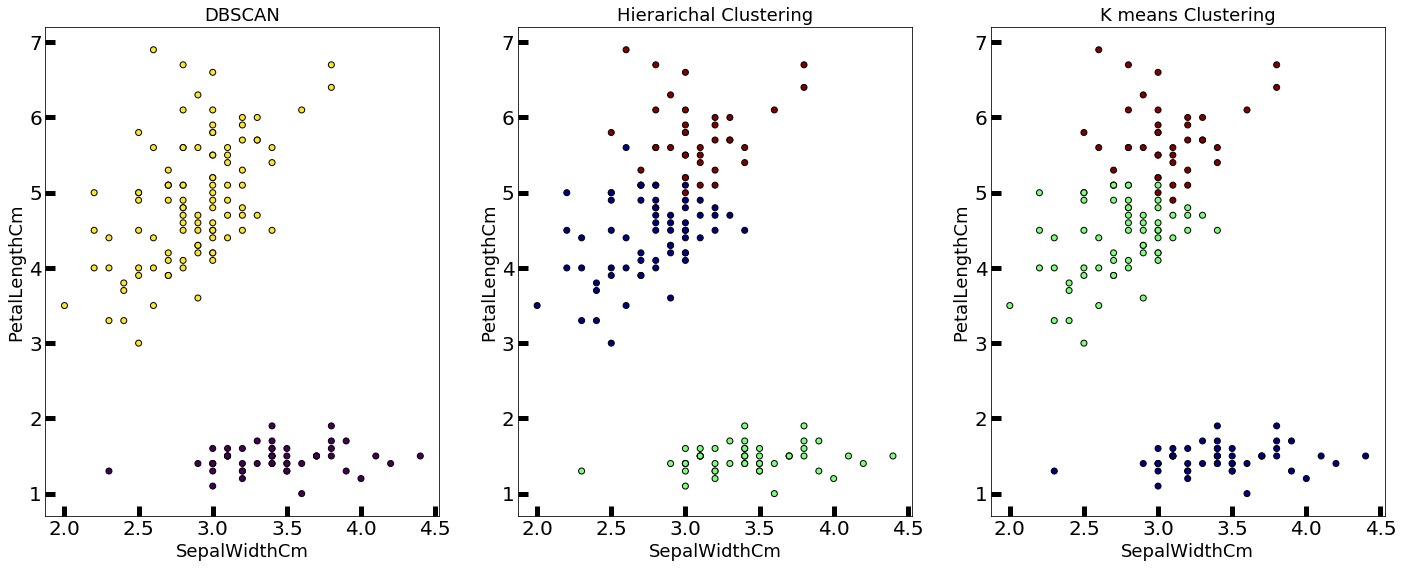

In [19]:
cluster(1,2)

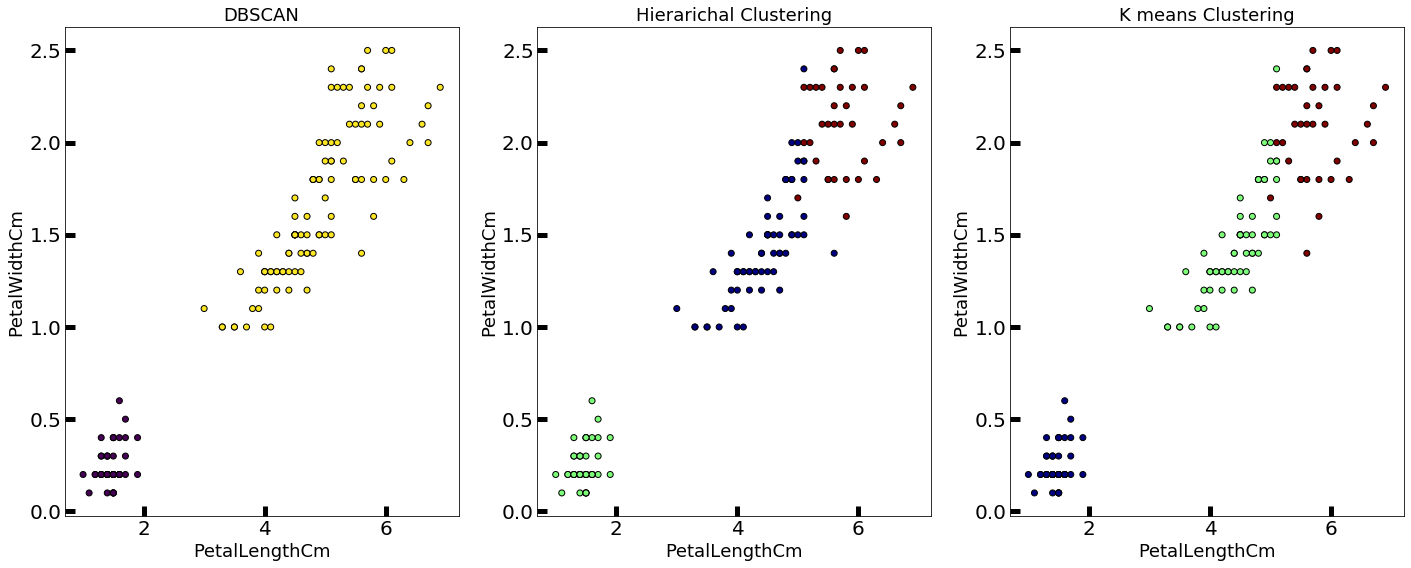

In [17]:
cluster(2,3)

Comparing the 3 models based on there adjusted rand score

In [31]:
def get_key(scores,val):
    for key,value in scores.items():
        if val == value:
            return key

In [32]:
scores = {
       'DBSCAN': adjusted_rand_score(y,clusters),
       'Hierarichal Clustering': adjusted_rand_score(y,y_hc),
       'K Means Clustering': adjusted_rand_score(y,y_pred)
}
arr = list(scores.values())
arr.sort(reverse = True)
for i in arr:
    lis.append(get_key(scores,i))

dict_values([0.5681159420289855, 0.7311985567707745, 0.7302382722834697])


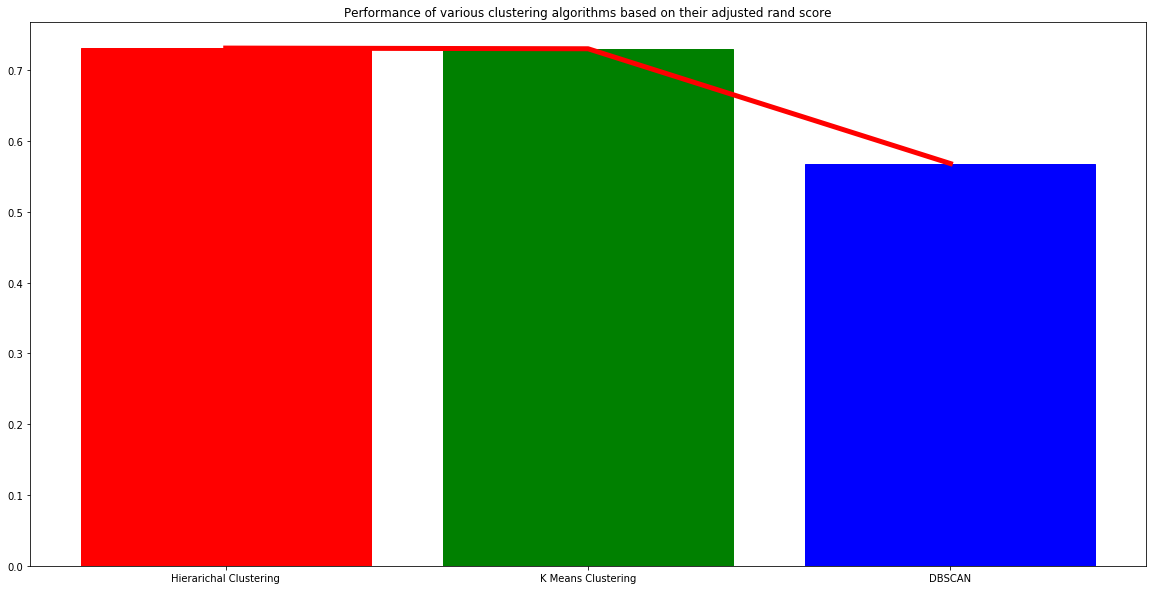

In [36]:
plt.figure(figsize = (20,10))
barlist = plt.bar(lis,arr)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
plt.plot(lis,arr,c= 'red',linewidth = 5)
plt.title('Performance of various clustering algorithms based on their adjusted rand score')
plt.show()